In [67]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
df = pdr.get_data_tiingo('SBUX', api_key='e5e1babf9dfd1b5387efeb2cd4d0de25c001376e')

C:\Users\ANAS\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [69]:
df.to_csv('SBUX.csv')

In [70]:
df.head()

close   high      low    open    volume  \
symbol date                                                                 
SBUX   2017-07-24 00:00:00+00:00  58.02  58.25  57.9300  58.000   7411252   
       2017-07-25 00:00:00+00:00  58.55  58.84  57.9800  58.215   7807274   
       2017-07-26 00:00:00+00:00  57.94  58.84  57.7847  58.800   8635845   
       2017-07-27 00:00:00+00:00  59.50  59.66  57.9300  58.250  19868659   
       2017-07-28 00:00:00+00:00  54.00  55.96  53.4100  55.230  52870500   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
SBUX   2017-07-24 00:00:00+00:00  52.482015  52.690061  52.400605  52.463924   
       2017-07-25 00:00:00+00:00  52.961426  53.223746  52.445833  52.658402   
       2017-07-26 00:00:00+00:00  52.409651  53.223746  52.269174  53.187564   
       2017-07-27 00:00:00+00:00  53.820749  53.965477  52.400605  52.690061   
       2017-07-28 00:00:00+00:00  48.845722  50.618641  48.312037  49.958319   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
SBUX   2017-07-24 00:00:00+00:00    7411252      0.0          1.0  
       2017-07-25 00:00:00+00:00    7807274      0.0          1.0  
       2017-07-26 00:00:00+00:00    8635845      0.0          1.0  
       2017-07-27 00:00:00+00:00   19868659      0.0          1.0  
       2017-07-28 00:00:00+00:00   52870500      0.0          1.0

In [71]:
df.tail()

close    high      low   open   volume  \
symbol date                                                                
SBUX   2022-07-18 00:00:00+00:00  80.23  81.665  80.0000  80.03  6768756   
       2022-07-19 00:00:00+00:00  82.55  82.670  80.9100  81.11  5949201   
       2022-07-20 00:00:00+00:00  83.27  83.469  81.8865  82.48  6850639   
       2022-07-21 00:00:00+00:00  83.54  83.610  82.6519  82.95  7695295   
       2022-07-22 00:00:00+00:00  83.59  84.430  82.8400  84.16  6283617   

                                  adjClose  adjHigh   adjLow  adjOpen  \
symbol date                                                             
SBUX   2022-07-18 00:00:00+00:00     80.23   81.665  80.0000    80.03   
       2022-07-19 00:00:00+00:00     82.55   82.670  80.9100    81.11   
       2022-07-20 00:00:00+00:00     83.27   83.469  81.8865    82.48   
       2022-07-21 00:00:00+00:00     83.54   83.610  82.6519    82.95   
       2022-07-22 00:00:00+00:00     83.59   84.430  82.8400    84.16   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
SBUX   2022-07-18 00:00:00+00:00    6768756      0.0          1.0  
       2022-07-19 00:00:00+00:00    5949201      0.0          1.0  
       2022-07-20 00:00:00+00:00    6850639      0.0          1.0  
       2022-07-21 00:00:00+00:00    7695295      0.0          1.0  
       2022-07-22 00:00:00+00:00    6283617      0.0          1.0

In [72]:
df1= df.reset_index()['close']

In [73]:
df1.shape

(1259,)

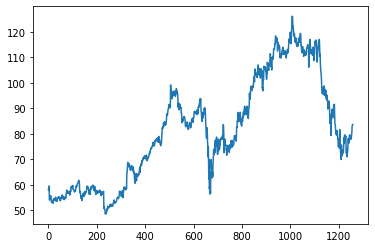

In [74]:
plt.plot(df1)

In [75]:
df1

0       58.02
1       58.55
2       57.94
3       59.50
4       54.00
        ...  
1254    80.23
1255    82.55
1256    83.27
1257    83.54
1258    83.59
Name: close, Length: 1259, dtype: float64

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
                      

In [77]:
df1.shape

(1259, 1)

In [78]:
df1

array([[0.12229102],
       [0.12912797],
       [0.12125903],
       ...,
       [0.44801342],
       [0.45149639],
       [0.45214138]])

In [79]:
training_size=int(len(df1)*0.55)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [80]:
test_size,training_size

(567, 692)

In [87]:

def create_dataset(dataset, time_step=100):
        
        X, Y = [],[]
        for i in range(len(dataset)-time_step - 1):
            a = dataset[i:(i+time_step),0]
            X.append(a)
            Y.append(dataset[i+ time_step,0])
        return np.array(X),np.array(Y)   

In [88]:

X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [62]:
time_step


100

In [93]:
print(X_train.shape), print(Y_train.shape), print(Y_test.shape)

(591, 100)
(591,)
(466,)


(None, None, None)

In [96]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [114]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [117]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [118]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 20s 756ms/step - loss: 0.0408 - val_loss: 0.0197
Epoch 2/100
10/10 [==============================] - 4s 422ms/step - loss: 0.0088 - val_loss: 0.0160
Epoch 3/100
10/10 [==============================] - 4s 401ms/step - loss: 0.0051 - val_loss: 0.0154
Epoch 4/100
10/10 [==============================] - 4s 449ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 5/100
10/10 [==============================] - 4s 436ms/step - loss: 0.0025 - val_loss: 0.0037
Epoch 6/100
10/10 [==============================] - 4s 445ms/step - loss: 0.0024 - val_loss: 0.0056
Epoch 7/100
10/10 [==============================] - 4s 433ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 8/100
10/10 [==============================] - 4s 416ms/step - loss: 0.0022 - val_loss: 0.0046
Epoch 9/100
10/10 [==============================] - 4s 417ms/step - loss: 0.0021 - val_loss: 0.0042
Epoch 10/100
10/10 [==============================] - 4s 369ms/step - loss: 0.0019 - val_l

In [122]:
train_predict= model.predict(X_train)
test_predict = model.predict(X_test)

15/15 [==============================] - 1s 69ms/step


In [125]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [126]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

5615.463741278359

In [128]:
math.sqrt(mean_squared_error(Y_test,test_predict))

100.47025075730382

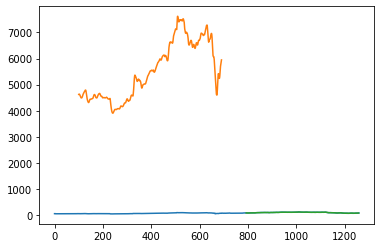

In [137]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [138]:
len(test_data)


567

In [139]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 226)

In [140]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [143]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)  

0 day input [0.88944788 0.88893189 0.8878999  0.88557792 0.86751806 0.89654283
 0.90621775 0.91331269 0.91124871 0.90712074 0.85268318 0.85307018
 0.83681631 0.81630547 0.82146543 0.83243034 0.84623323 0.84584623
 0.84029928 0.81488648 0.82082043 0.79682663 0.83049536 0.81166151
 0.80379257 0.81398349 0.82133643 0.80856553 0.80495356 0.80572755
 0.80263158 0.81695046 0.81153251 0.83630031 0.8378483  0.84262126
 0.8501032  0.85152219 0.85358617 0.85629515 0.8381063  0.83410733
 0.74213106 0.79024768 0.81153251 0.82649639 0.82069143 0.88196594
 0.85939112 0.84610423 0.83475232 0.81140351 0.81501548 0.81695046
 0.82159443 0.8253354  0.83023736 0.80288958 0.81153251 0.83900929
 0.84404025 0.80134159 0.80224458 0.78818369 0.7755418  0.81114551
 0.80882353 0.83617131 0.87358101 0.87345201 0.86184211 0.87964396
 0.86455108 0.85358617 0.85319917 0.83913829 0.7751548  0.76818885
 0.79760062 0.81527348 0.82340041 0.84726522 0.86468008 0.875129
 0.87332301 0.88273994 0.87899897 0.84752322 0.79850

ValueError: cannot reshape array of size 225 into shape (1,100,1)

In [144]:
len(df1)


1259

In [146]:
df3=df1.tolist()
df3.extend(lst_output)

In [147]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

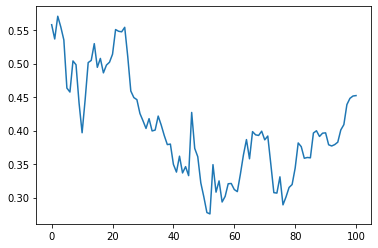

In [148]:
plt.plot((df1[1158:]))
plt.plot((lst_output))

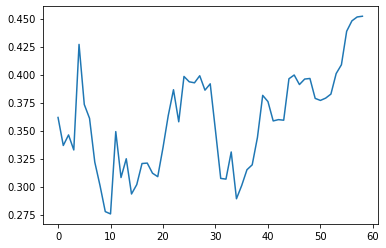

In [149]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [150]:
df3=scaler.inverse_transform(df3).tolist()

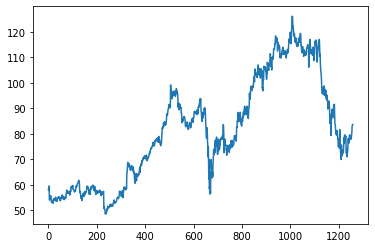

In [151]:
plt.plot(df3)